In [1]:
import pandas as pd
import numpy as np
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns

from keplergl import KeplerGl
import geopandas as gpd


In [2]:
#['N139LB', N211LB', 'N226LB', 'N228LB', 'N235LB', 'N238LB', 'N252LB', 'N271LB', 'N329LB', 'N789LB', 'N139LB', 'N166LB', 'N221LB', 
# 'N225LB']
loon =  'N221LB'

os.chdir("/Users/toni/Documents/TFG/og_data/DBSCAN/epsRange/" + loon)
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

raw_df = pd.concat([pd.read_csv(f) for f in all_filenames ])


In [3]:
bl = raw_df.copy()

In [4]:
bl['max_distance'] = bl['max_distance'].astype(str)
bl

ts aircraft_id    alt  speed  Direction  \
0       2017-12-22 04:06:58+00:00     HBAL082  40075     73        118   
1       2017-12-22 04:07:59+00:00     HBAL082  40625     71        117   
2       2017-12-22 04:09:01+00:00     HBAL082  41275     75        123   
3       2017-12-22 04:10:02+00:00     HBAL082  41925     78        119   
4       2017-12-22 04:11:04+00:00     HBAL082  42600     73        122   
...                           ...         ...    ...    ...        ...   
269129  2020-06-15 07:50:40+00:00     HBAL163  53900     11        120   
269130  2020-06-15 07:51:44+00:00     HBAL163  53900     11        120   
269131  2020-06-15 07:52:48+00:00     HBAL163  53700     11        127   
269132  2020-06-15 07:53:54+00:00     HBAL163  53700     11        127   
269133  2020-06-15 07:54:46+00:00     HBAL163  53800     11        127   

       registration_id        lat        lon   prev_lat   prev_lon prev_air  \
0               N221LB  17.934902 -65.559296        NaN        NaN      NaN   
1               N221LB  17.925312 -65.540169  17.934902 -65.559296  HBAL082   
2               N221LB  17.914719 -65.521690  17.925312 -65.540169  HBAL082   
3               N221LB  17.903183 -65.501984  17.914719 -65.521690  HBAL082   
4               N221LB  17.892242 -65.482277  17.903183 -65.501984  HBAL082   
...                ...        ...        ...        ...        ...      ...   
269129          N221LB -18.501629  60.174866 -18.499859  60.171921  HBAL163   
269130          N221LB -18.503584  60.177914 -18.501629  60.174866  HBAL163   
269131          N221LB -18.505491  60.180859 -18.503584  60.177914  HBAL163   
269132          N221LB -18.507587  60.183704 -18.505491  60.180859  HBAL163   
269133          N221LB -18.509262  60.186047 -18.507587  60.183704  HBAL163   

                          prev_ts  distance_since_last_record  \
0                             NaN                    0.000000   
1       2017-12-22 04:06:58+00:00                    2.287313   
2       2017-12-22 04:07:59+00:00                    2.282496   
3       2017-12-22 04:09:01+00:00                    2.448021   
4       2017-12-22 04:10:02+00:00                    2.414216   
...                           ...                         ...   
269129  2020-06-15 07:49:37+00:00                    0.367661   
269130  2020-06-15 07:50:40+00:00                    0.388016   
269131  2020-06-15 07:51:44+00:00                    0.376030   
269132  2020-06-15 07:52:48+00:00                    0.379886   
269133  2020-06-15 07:53:54+00:00                    0.309395   

           time_since_last_record  cluster       eps        max_distance  
0       0 days 00:00:00.000000000        0  0.000509  3.2421052631578946  
1       0 days 00:01:01.000000000        0  0.000509  3.2421052631578946  
2       0 days 00:01:02.000000000        0  0.000509  3.2421052631578946  
3       0 days 00:01:01.000000000        0  0.000509  3.2421052631578946  
4       0 days 00:01:02.000000000        0  0.000509  3.2421052631578946  
...                           ...      ...       ...                 ...  
269129  0 days 00:01:03.000000000       28  0.001002    6.38421052631579  
269130  0 days 00:01:04.000000000       28  0.001002    6.38421052631579  
269131  0 days 00:01:04.000000000       28  0.001002    6.38421052631579  
269132  0 days 00:01:06.000000000       28  0.001002    6.38421052631579  
269133  0 days 00:00:52.000000000       28  0.001002    6.38421052631579  

[2153072 rows x 17 columns]

In [5]:
distance_values = bl.max_distance.unique().astype(float)
kms_per_radian = 6371.0088

eps_values = distance_values / kms_per_radian

eps_df = pd.DataFrame(columns=['eps', 'distance'])

eps_df['eps'] = eps_values
eps_df['distance'] = distance_values
eps_df = eps_df.sort_values('distance')

eps_df

eps  distance
2  0.000016  0.100000
5  0.000180  1.147368
1  0.000344  2.194737
0  0.000509  3.242105
6  0.000673  4.289474
4  0.000838  5.336842
7  0.001002  6.384211
3  0.001166  7.431579

In [6]:
cluster_info = bl.groupby(['registration_id', 'eps', 'max_distance'])['ts'].count().reset_index()


In [7]:
def get_num_clusters(registration_id, max_distance):
    
    return bl.loc[(bl.registration_id == registration_id)\
                  & (bl.max_distance == max_distance)]['cluster'].nunique() - 1
    
cluster_info['num_clusters'] = cluster_info.apply(lambda x: get_num_clusters(x.registration_id, x.max_distance),\
                                                  axis=1)



In [8]:
def get_noise_share(registration_id, num_traces, max_distance):
    
    num_noise_records = bl.loc[(bl.registration_id == registration_id) \
                               & (bl.max_distance == max_distance)\
                               & (bl.cluster == -1)]['ts'].count()
    

    return num_noise_records/num_traces

cluster_info['noise_share'] = cluster_info.apply(lambda x: get_noise_share(x.registration_id,\
                                                                            x.ts, x.max_distance), \
                                                                axis=1)



In [9]:
def get_cluster_share(registration_id, num_traces, max_distance):
    
    num_cluster_records = bl.loc[(bl.registration_id == registration_id) \
                               & (bl.max_distance == max_distance)\
                               & (bl.cluster != -1)]['ts'].count()
    

    return num_cluster_records/num_traces

cluster_info['cluster_share'] = cluster_info.apply(lambda x: get_cluster_share(x.registration_id,\
                                                                            x.ts, x.max_distance), \
                                                                axis=1)

In [10]:
def get_largest_component(registration_id, num_traces, max_distance):
    
    # Noise is not a real cluster so we exclude it
    eps_df = bl.loc[(bl.registration_id == registration_id) & (bl.max_distance == max_distance)\
                    & (bl.cluster != -1)]
    
    biggest_cluster = eps_df.groupby(['registration_id', 'max_distance', 'cluster'])['ts'].count().max()

    return biggest_cluster/num_traces

cluster_info['largest_component_share'] = cluster_info.apply(lambda x: get_largest_component(x.registration_id,\
                                                                                       x.ts, x.max_distance), \
                                                         axis=1)


In [11]:
cluster_info

registration_id       eps        max_distance      ts  num_clusters  \
0          N221LB  0.000016                 0.1  269134          2536   
1          N221LB  0.000180  1.1473684210526316  269134           119   
2          N221LB  0.000344   2.194736842105263  269134            66   
3          N221LB  0.000509  3.2421052631578946  269134            52   
4          N221LB  0.000673  4.2894736842105265  269134            43   
5          N221LB  0.000838   5.336842105263157  269134            34   
6          N221LB  0.001002    6.38421052631579  269134            29   
7          N221LB  0.001166    7.43157894736842  269134            26   

   noise_share  cluster_share  largest_component_share  
0     0.098352       0.901648                 0.313439  
1     0.000338       0.999662                 0.796298  
2     0.000082       0.999918                 0.824496  
3     0.000045       0.999955                 0.833826  
4     0.000026       0.999974                 0.835532  
5     0.000022       0.999978                 0.835751  
6     0.000019       0.999981                 0.869938  
7     0.000019       0.999981                 0.869938

FileNotFoundError: [Errno 2] No such file or directory: '/Users/toni/Desktop/DBSCAN-EPS-FIGURES/N221LB-NOISE.png'

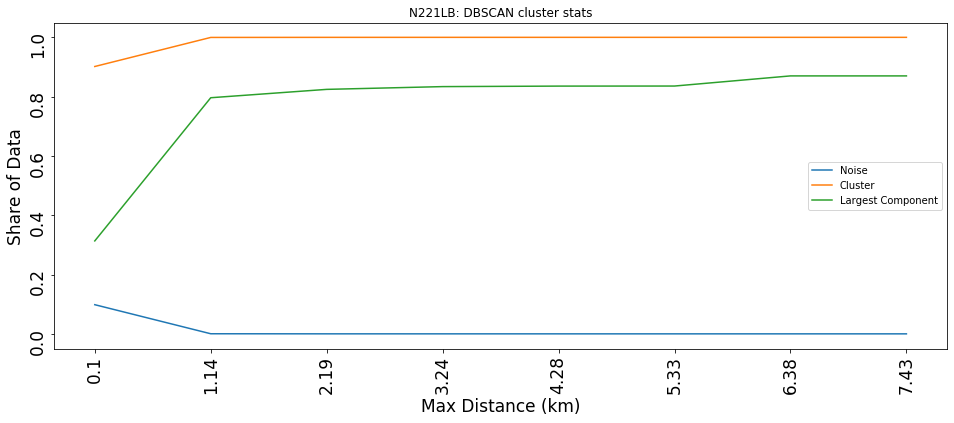

In [12]:
plt.figure(loon, figsize=(16,6))

cluster_info['eps'] = cluster_info.eps.astype(str)

ax = sns.lineplot(x=cluster_info['max_distance'].astype(str).str[:4], y="noise_share", sort=False, label='Noise',\
                 data=cluster_info)

ax = sns.lineplot(x=cluster_info['max_distance'].astype(str).str[:4], y="cluster_share", sort=False, label='Cluster',\
                 data=cluster_info, ax=ax)

ax = sns.lineplot(x=cluster_info['max_distance'].astype(str).str[:4], y="largest_component_share", sort=False, label='Largest Component',\
                 data=cluster_info, ax=ax)

#ax.set(ylim=(0, 50))
dummy = ax.set_ylabel('Share of Data', fontsize=17)
dummy = ax.set_xlabel('Max Distance (km)', fontsize=17)
dummy = ax.set_title(loon + ': DBSCAN cluster stats')
dummy = ax.tick_params(labelsize=17, rotation = 90)

ax.figure.savefig("/Users/toni/Desktop/DBSCAN-EPS-FIGURES/" + loon + "-NOISE.png")



FileNotFoundError: [Errno 2] No such file or directory: '/Users/toni/Desktop/DBSCAN-EPS-FIGURES/N221LB-NCLUS1.png'

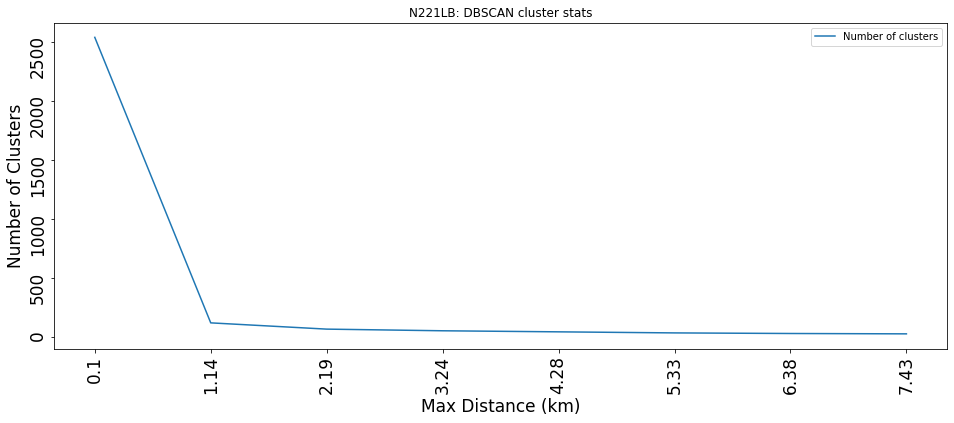

In [13]:
plt.figure(loon, figsize=(16,6))

cluster_info['eps'] = cluster_info.eps.astype(str)

ax = sns.lineplot(x=cluster_info['max_distance'].astype(str).str[:4], y="num_clusters", sort=False, label='Number of clusters',\
                 data=cluster_info)


#ax.set(ylim=(0, 50))
dummy = ax.set_ylabel('Number of Clusters', fontsize=17)
dummy = ax.set_xlabel('Max Distance (km)', fontsize=17)
dummy = ax.set_title(loon + ': DBSCAN cluster stats')
dummy = ax.tick_params(labelsize=17, rotation = 90)

ax.figure.savefig("/Users/toni/Desktop/DBSCAN-EPS-FIGURES/" + loon + "-NCLUS1.png")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/toni/Desktop/DBSCAN-EPS-FIGURES/N221LB-NCLUS2.png'

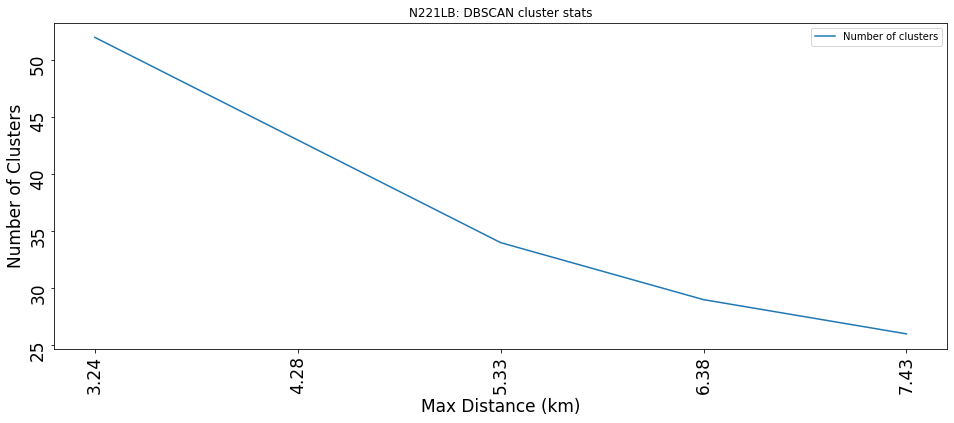

In [14]:
plt.figure(loon, figsize=(16,6))

cluster_info['eps'] = cluster_info.eps.astype(str)

ax = sns.lineplot(x=cluster_info['max_distance'].astype(str).str[:4], y="num_clusters", sort=False, label='Number of clusters',\
                 data=cluster_info[3:])


#ax.set(ylim=(0, 50))
dummy = ax.set_ylabel('Number of Clusters', fontsize=17)
dummy = ax.set_xlabel('Max Distance (km)', fontsize=17)
dummy = ax.set_title(loon + ': DBSCAN cluster stats')
dummy = ax.tick_params(labelsize=17, rotation = 90)

ax.figure.savefig("/Users/toni/Desktop/DBSCAN-EPS-FIGURES/" + loon + "-NCLUS2.png")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/toni/Desktop/DBSCAN-EPS-FIGURES/N221LB-VEL.png'

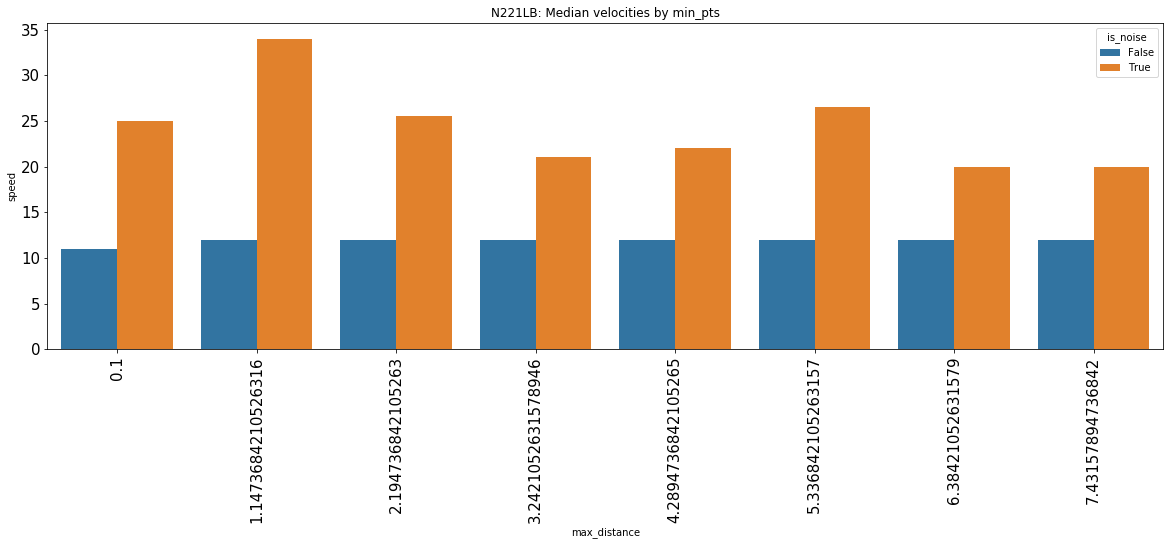

In [15]:
bl['is_noise'] = bl['cluster'].apply(lambda x: True if x == -1 else False)

target_velocities = bl.loc[bl.registration_id == loon]\
                                .groupby(['registration_id', 'max_distance', 'is_noise'])\
                                .median().reset_index()
target_velocities['max_distance'] = target_velocities['max_distance'].astype(float)
plt.figure(loon, figsize=(20,6))

ax = sns.barplot(x=target_velocities['max_distance'], y="speed", hue='is_noise',\
                data=target_velocities)

#ax.set(ylim=(0, 50))
dummy = ax.set_ylabel('speed')
dummy = ax.set_xlabel('max_distance')
dummy = ax.set_title(loon + ': Median velocities by min_pts')
dummy = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
dummy = ax.tick_params(labelsize=15)

ax.figure.savefig("/Users/toni/Desktop/DBSCAN-EPS-FIGURES/" + loon + "-VEL.png")



In [ ]:
bl.max_distance.unique()

In [17]:
aaaaaaa

NameError: name 'aaaaaaa' is not defined

In [18]:
# Visual confirmation

#Create a basemap 
map = KeplerGl(height=700, width=800, theme="light")#show the map
map

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(height=700)

In [19]:
# Create a geodataframe
#bl_kepler = bl.loc[(bl.max_distance.astype(float) > 17) & (bl.max_distance.astype(float) < 22)].copy()
distances_to_show = ['6.', '5.']
bl['max_distance_r'] = bl['max_distance'].str[:2]
bl_kepler = bl.loc[bl.max_distance_r.isin(distances_to_show)].copy()


bl_kepler['max_distance'] = bl_kepler['max_distance'].astype(str) + 'MAX'
gdf = gpd.GeoDataFrame(bl_kepler, geometry=gpd.points_from_xy(bl_kepler.lon, bl_kepler.lat))

map.add_data(data=gdf, name="loon traces")

In [ ]:
bl_kepler

In [ ]:
'''
Loon: Chosen eps - Max_distance 

N139LB: 0.000673 - 4.2894736842105265
Comment: 

N166LB: 0.001002 - 6.38
Comment:

N191LB: 0.001331 - 8.478947368421053
Comment: Todos lo hacen bastante mal pero se arreglará con minpts

N211LB: 0.000838 - 5.336842105263157
Comment: 

N221LB: 0.000838	5.336842
Comment:

N225LB: 0.001331 - 8.478947368421053
Comment:

N226LB: 0.000838 - 5.336842105263157
Comment: Max value getting all clusters right

N228LB: 0.000673 - 4.2894736842105265
Comment:

N234LB: 0.001660 - 10.573684210526316
Comment: 

N238LB: 0.001331- 8.478947368421053

N235LB: 0.001331 - 8.478947368421053
Comment: 

N238LB: 0.000838 - 5.3388
Comment: highest value of first valley in 'largest cluster' graph

N252LB: 0.000509	3.242105

N253LB: 0.000673	4.289474

N271LB: 0.000838	5.336842

N329LB: 0.000509	3.242105

N789LB: 0.000838	5.336842




'''

In [20]:
eps_df

eps  distance
2  0.000016  0.100000
5  0.000180  1.147368
1  0.000344  2.194737
0  0.000509  3.242105
6  0.000673  4.289474
4  0.000838  5.336842
7  0.001002  6.384211
3  0.001166  7.431579